<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-HW-6/blob/main/ML_Zoomcamp_HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning ZoomCamp - Homework 6
**Author.....: Carlos Manuel de Oliveira Alves**<br>
**Created...: 18/10/2022**

In [2]:
# Import all necessay libraries that we will use in this homework
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Import the library warnings to ignore the warnings from the system
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
# Locate dataset for the homework
df_url='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df=pd.read_csv(df_url)

In [7]:
# Check the first 5 rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Check the names of the columns of the dataset
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
# Fill NAs with 0

# Step 1: Check the description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# Step 2: Check the total of NAs
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
# Step 3: Fill the NAs with zeros 
df=df.fillna(0)

In [12]:
# Step 4: Check the total of NAs
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

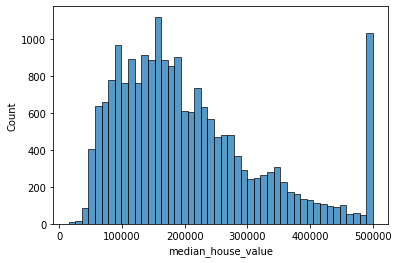

In [13]:
# Apply the log tranform to median_house_value:

# Plot the median_house_value
sns.histplot(df['median_house_value']);

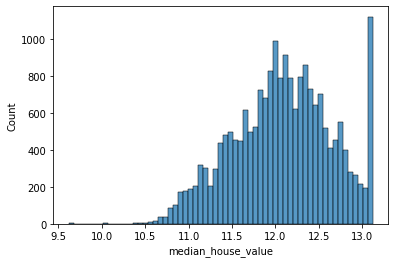

In [14]:
# Apply and plot the log tranform to median_house_value
df['median_house_value']=np.log1p(df['median_house_value'])
sns.histplot(df['median_house_value']);

In [16]:
# Do train/validation/test split with 60%/20%/20% distribution:

# Split the data into full train and test dataframes
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Split the data into train and validation dataframes
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
# Reset the indexes of train, validation and test dataframes
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [18]:
# Get the median_house_value feature from train, validation and test dataframes
y_train = (df_train.median_house_value).values
y_val = (df_val.median_house_value).values
y_test = (df_test.median_house_value).values

In [19]:
# Delete the feature median_house_value from the dataframes: train, validation and test
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [20]:
# Check it delete the feature from the train dataframe
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.18,34.63,19.0,3562.0,606.0,1677.0,578.0,4.1573,INLAND
1,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,INLAND
2,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,NEAR OCEAN
3,-117.33,34.17,5.0,4718.0,1140.0,2564.0,1056.0,2.9877,INLAND
4,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,INLAND
...,...,...,...,...,...,...,...,...,...
12379,-118.19,34.06,32.0,555.0,159.0,748.0,163.0,1.9762,<1H OCEAN
12380,-122.30,37.90,37.0,2125.0,489.0,912.0,462.0,2.9219,NEAR BAY
12381,-118.36,33.90,18.0,3380.0,922.0,2276.0,854.0,4.0727,<1H OCEAN
12382,-119.79,36.78,41.0,2227.0,462.0,1129.0,415.0,2.3190,INLAND


In [21]:
# Use DictVectorizer to turn the dataframe into matrices

# Turn our train dataframe into a list of dictionaries
train_dicts = df_train.to_dict(orient='records')

# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the function transform with our DictVectorizer
X_train = dv.fit_transform(train_dicts)

In [22]:
# Train our decision tree using regression and with the max depth set to one
dt = DecisionTreeRegressor(max_depth=1)

# For training the model we use the fit method
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [23]:
# Print the train decision tree with feature names
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



In [24]:
# QUESTION 1 : Which feature is used for splitting the data?
# ANSWER.... : ocean_proximity=INLAND

In [ ]:
# Train a random forest model with these parameters:
# n_estimators=10
# random_state=1
# n_jobs=-1 (optional - to make training faster)
rf = RandomForestRegressor(n_estimators=10, random_state=1)

# For training the model we use the fit method
rf.fit(X_train, y_train)